# クラスターの数の選び方

前の課題と同じコードを使い, クラスターの数が1から10の場合におけるWCSSの値を求めましょう

## ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## データの読み込み

In [8]:
# データの読み込み
data = pd.read_csv('Countries-exercise (2).csv')
# 中身の確認
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## データのプロット

<i>'Longtitude'</i> と <i>'Latitude'</i> の散布図を作成します

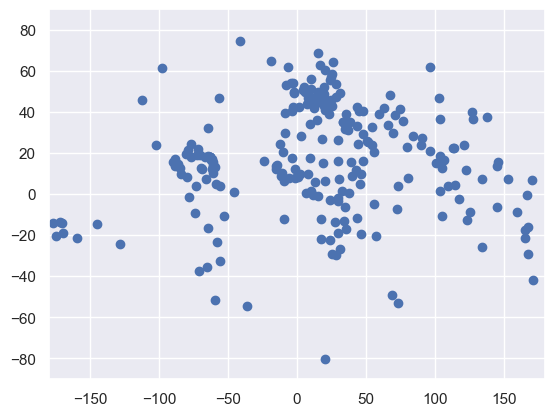

In [9]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## 特徴量の選択

'Longitude' と 'Laditude'を選択します

In [10]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## クラスタリング

最初はクラスターの数は4にします

In [11]:
kmeans = KMeans(4)

In [12]:
kmeans.fit(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

### クラスタリングの結果

In [13]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 3, 1, 0, 3, 2, 1, 1, 2, 2, 2,
       3, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 3, 1, 1, 2, 0, 3, 2, 2,
       1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1,
       2, 2, 1, 2, 3, 0, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       3, 0, 3, 1, 0, 2, 0, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2,
       3, 1, 1, 1, 1, 3, 0, 0, 3, 2, 1, 3, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       3, 0, 2, 2, 2, 1, 1, 0, 3, 2, 2, 2, 3, 2, 3, 3, 1, 2, 0, 1, 1, 3,
       1, 3, 2, 3, 2, 0, 0, 2, 2, 1, 3, 3, 1, 1, 0, 0, 0, 3, 3, 3, 2, 0,
       3, 2, 0, 2, 0, 1, 2, 3, 1, 2, 1, 1, 1, 2, 3, 0, 2, 3, 2, 0, 2, 1,
       1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 3, 1, 1, 3, 0, 0, 2,
       2, 3, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 1, 1],
      dtype=int32)

In [14]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


データをクラスターで分けるためにパラメータを設定した上で改めて散布図を作成します

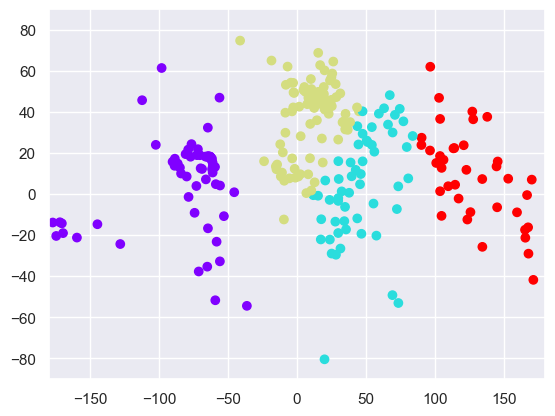

In [15]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## クラスターの数の選択

### WCSS

In [16]:
kmeans.inertia_

256590.58575406106

1 から 10までのECSSの値をリストに保存していきます

In [17]:
wcss = []
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [18]:
wcss

[1413859.6798344275,
 657012.0797586325,
 325235.52237055905,
 256573.086759343,
 192194.9829002524,
 151462.83793490712,
 126799.1009390775,
 102913.6196230242,
 84967.41720068289,
 76571.81780508837]

### エルボー法

Text(0, 0.5, 'Within-cluster Sum of Squares')

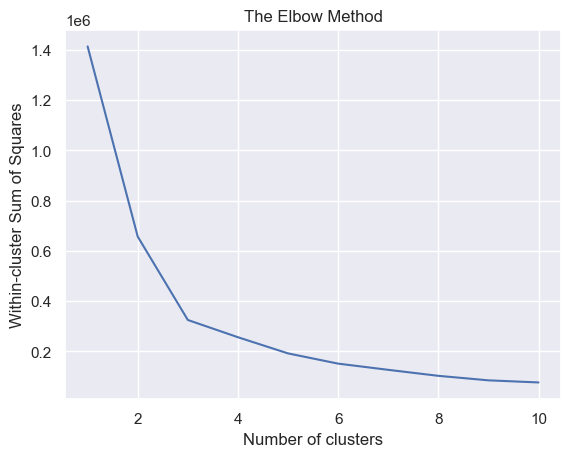

In [19]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

カーブを元に、適切なクラスターの数を推測します

今回の場合は2か3となります

In [20]:
kmeans = KMeans(2)
kmeans.fit(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [21]:
identified_clusters = kmeans.fit_predict(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters

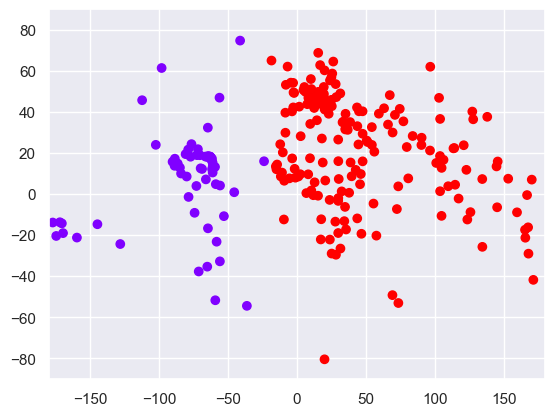

In [23]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [24]:
kmeans = KMeans(3)
kmeans.fit(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [25]:
identified_clusters = kmeans.fit_predict(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters

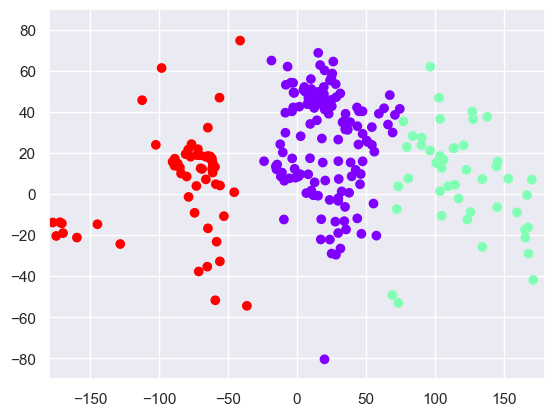

In [27]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()